In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import date, datetime, timedelta
import pickle
import plotly.offline as py
import plotly.graph_objs as go
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#import cufflinks as cf
import seaborn as sns

## For Original 40 minutes Assumption

In [2]:
data = pd.read_csv("turbine&weather_combined.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Columns: 124 entries, kW_Turbine1 to weather_day_of_week
dtypes: float64(101), int64(9), object(14)
memory usage: 2.5+ MB


In [4]:
for c in data.columns:
    print(c)

kW_Turbine1
kW_Turbine2
kW_Turbine3
kW_Turbine4
kW_Turbine5
kW_Turbine6
kW_Turbine7
kW_Turbine8
kW_Turbine9
kW_Turbine10
kW_Turbine11
kW_Turbine12
kW_Turbine13
kW_Turbine14
kW_Turbine15
kW_Turbine16
kW_Turbine17
kW_Turbine18
kW_Turbine19
kW_Turbine20
kW_Turbine21
kW_Turbine22
kW_Turbine23
kW_Turbine24
kW_Turbine25
kW_Turbine26
kW_Turbine27
kW_Turbine28
kW_Turbine29
kW_Turbine30
kW_Turbine31
kW_Turbine32
kW_Turbine33
kW_Turbine34
kW_Turbine35
kW_Turbine36
kW_Turbine37
kW_Turbine38
kW_Turbine39
kW_Turbine40
kW_Turbine41
kW_Turbine42
kW_Turbine43
kW_Turbine44
kW_Turbine45
kW_Turbine46
kW_Turbine47
kW_Turbine48
kW_Turbine49
kW_Turbine50
kW_Turbine51
kW_Turbine52
kW_Turbine53
kW_Turbine54
kW_Turbine55
kW_Turbine56
kW_Turbine57
kW_Turbine58
kW_Turbine59
kW_Turbine60
kW_Turbine61
kW_Turbine62
kW_Turbine63
kW_Turbine64
kW_Turbine65
kW_Turbine66
kW_Turbine67
kW_Turbine68
kW_Turbine69
kW_Turbine70
kW_Turbine71
kW_Turbine72
kW_Turbine73
kW_Turbine74
kW_Turbine75
kW_Turbine76
kW_Turbine77
kW_Turbi

In [5]:
data = data[['timestamp', 'avg_kW_reading', 'wspd']]

In [6]:
data.shape

(2600, 3)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
timestamp         2600 non-null object
avg_kW_reading    2600 non-null float64
wspd              2595 non-null float64
dtypes: float64(2), object(1)
memory usage: 61.0+ KB


In [8]:
data = data.dropna(subset = ['wspd'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2595 entries, 0 to 2599
Data columns (total 3 columns):
timestamp         2595 non-null object
avg_kW_reading    2595 non-null float64
wspd              2595 non-null float64
dtypes: float64(2), object(1)
memory usage: 81.1+ KB


In [10]:
def df_derived_by_shift(df,lag=0,NON_DER=[]):
    df = df.copy()
    if not lag:
        return df
    cols ={}
    for i in range(1,lag+1):
        for x in list(df.columns):
            if x not in NON_DER:
                if not x in cols:
                    cols[x] = ['{}_{}'.format(x, i)]
                else:
                    cols[x].append('{}_{}'.format(x, i))
    for k,v in cols.items():
        columns = v
        dfn = pd.DataFrame(data=None, columns=columns, index=df.index)    
        i = 1
        for c in columns:
            dfn[c] = df[k].shift(periods=i)
            i+=1
        df = pd.concat([df, dfn], axis=1, join_axes=[df.index])
    return df

## Lagging windspeed

In [11]:
NON_DER = ['timestamp','avg_kW_reading']
df_new = df_derived_by_shift(data, 500, NON_DER)

In [12]:
df_new

,timestamp,avg_kW_reading,wspd,wspd_1,wspd_2,wspd_3,wspd_4,wspd_5,wspd_6,wspd_7,...,wspd_491,wspd_492,wspd_493,wspd_494,wspd_495,wspd_496,wspd_497,wspd_498,wspd_499,wspd_500
0,2016-01-01 00:00:00,378.589667,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01 01:40:48,324.420111,0.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01 03:21:36,350.998667,0.0,0.0,8.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01 05:02:24,302.126000,0.0,0.0,0.0,8.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01 06:43:12,320.931889,0.0,0.0,0.0,0.0,8.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-01-01 08:24:00,383.948111,0.0,0.0,0.0,0.0,0.0,8.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2016-01-01 10:04:48,622.666000,8.0,0.0,0.0,0.0,0.0,0.0,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-01-01 11:45:36,889.557444,6.0,8.0,0.0,0.0,0.0,0.0,0.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016-01-01 13:26:24,952.638556,3.0,6.0,8.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2016-01-01 15:07:12,1063.391111,0.0,3.0,6.0,8.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
res = df_new.corr()
res

,avg_kW_reading,wspd,wspd_1,wspd_2,wspd_3,wspd_4,wspd_5,wspd_6,wspd_7,wspd_8,...,wspd_491,wspd_492,wspd_493,wspd_494,wspd_495,wspd_496,wspd_497,wspd_498,wspd_499,wspd_500
avg_kW_reading,1.000000,-0.037300,-0.045201,-0.050638,-0.054704,-0.058628,-0.061461,-0.062686,-0.062189,-0.059901,...,-0.188618,-0.178634,-0.171248,-0.167057,-0.167229,-0.168840,-0.171413,-0.176008,-0.178322,-0.179159
wspd,-0.037300,1.000000,0.830621,0.727343,0.647502,0.578658,0.524281,0.465094,0.422065,0.411796,...,0.025485,0.017115,0.017625,0.024149,0.024943,0.019954,0.017147,0.031022,0.040080,0.038437
wspd_1,-0.045201,0.830621,1.000000,0.830616,0.727343,0.647451,0.578632,0.524226,0.465280,0.422515,...,0.037716,0.025710,0.017261,0.017696,0.024451,0.025245,0.019927,0.017218,0.030807,0.039889
wspd_2,-0.050638,0.727343,0.830616,1.000000,0.830613,0.727341,0.647436,0.578607,0.524352,0.465623,...,0.042376,0.037844,0.025791,0.017300,0.017862,0.024620,0.025230,0.019966,0.017100,0.030704
wspd_3,-0.054704,0.647502,0.727343,0.830613,1.000000,0.830645,0.727334,0.647431,0.578708,0.524658,...,0.058692,0.042455,0.037894,0.025814,0.017400,0.017962,0.024611,0.025253,0.019899,0.017040
wspd_4,-0.058628,0.578658,0.647451,0.727341,0.830645,1.000000,0.830656,0.727296,0.647723,0.579360,...,0.063732,0.059028,0.042673,0.038001,0.026251,0.017833,0.017923,0.024716,0.024934,0.019613
wspd_5,-0.061461,0.524281,0.578632,0.647436,0.727334,0.830656,1.000000,0.830651,0.727442,0.648134,...,0.072698,0.063867,0.059114,0.042713,0.038176,0.026422,0.017818,0.017962,0.024599,0.024830
wspd_6,-0.062686,0.465094,0.524226,0.578607,0.647431,0.727296,0.830651,1.000000,0.830885,0.728016,...,0.071083,0.072936,0.064021,0.059188,0.043025,0.038486,0.026395,0.017890,0.017741,0.024404
wspd_7,-0.062189,0.422065,0.465280,0.524352,0.578708,0.647723,0.727442,0.830885,1.000000,0.830918,...,0.078349,0.070783,0.072738,0.063926,0.058784,0.042612,0.038533,0.026294,0.018233,0.018048
wspd_8,-0.059901,0.411796,0.422515,0.465623,0.524658,0.579360,0.648134,0.728016,0.830918,1.000000,...,0.074369,0.077738,0.070384,0.072562,0.063085,0.057938,0.042721,0.038337,0.027010,0.018867


In [16]:
res.shape

(502, 502)

In [23]:
coefficients = res[1:]['avg_kW_reading']
coefficients

wspd       -0.037300
wspd_1     -0.045201
wspd_2     -0.050638
wspd_3     -0.054704
wspd_4     -0.058628
wspd_5     -0.061461
wspd_6     -0.062686
wspd_7     -0.062189
wspd_8     -0.059901
wspd_9     -0.059363
wspd_10    -0.059812
wspd_11    -0.063731
wspd_12    -0.067890
wspd_13    -0.071748
wspd_14    -0.076463
wspd_15    -0.082375
wspd_16    -0.088609
wspd_17    -0.093866
wspd_18    -0.099634
wspd_19    -0.103854
wspd_20    -0.107938
wspd_21    -0.113445
wspd_22    -0.117185
wspd_23    -0.117998
wspd_24    -0.117226
wspd_25    -0.115747
wspd_26    -0.115439
wspd_27    -0.115046
wspd_28    -0.113876
wspd_29    -0.114750
              ...   
wspd_471   -0.203731
wspd_472   -0.202876
wspd_473   -0.204002
wspd_474   -0.207027
wspd_475   -0.209105
wspd_476   -0.208380
wspd_477   -0.208734
wspd_478   -0.209564
wspd_479   -0.209947
wspd_480   -0.212782
wspd_481   -0.216212
wspd_482   -0.218665
wspd_483   -0.219511
wspd_484   -0.220408
wspd_485   -0.221759
wspd_486   -0.218822
wspd_487   -0

In [29]:
lag = np.arange(0,501)

In [30]:
lag

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

Text(0, 0.5, 'Pearson_corr_coef')

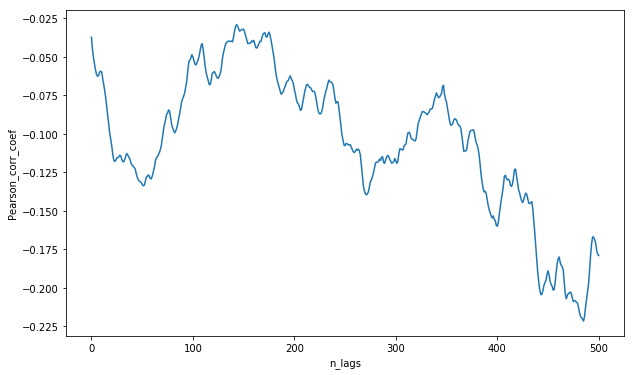

In [40]:
plt.figure(figsize=(10,6))
plt.plot(lag, coefficients)
plt.xlabel('n_lags')
plt.ylabel('Pearson_corr_coef')

In [33]:
np.corrcoef(data['avg_kW_reading'],data['wspd'])

array([[ 1.       , -0.0372995],
       [-0.0372995,  1.       ]])

## Lagging avg_kW_reading

In [41]:
NON_DER = ['timestamp','wspd']
df_new = df_derived_by_shift(data, 500, NON_DER)

In [42]:
df_new

,timestamp,avg_kW_reading,wspd,avg_kW_reading_1,avg_kW_reading_2,avg_kW_reading_3,avg_kW_reading_4,avg_kW_reading_5,avg_kW_reading_6,avg_kW_reading_7,...,avg_kW_reading_491,avg_kW_reading_492,avg_kW_reading_493,avg_kW_reading_494,avg_kW_reading_495,avg_kW_reading_496,avg_kW_reading_497,avg_kW_reading_498,avg_kW_reading_499,avg_kW_reading_500
0,2016-01-01 00:00:00,378.589667,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-01 01:40:48,324.420111,0.0,378.589667,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-01-01 03:21:36,350.998667,0.0,324.420111,378.589667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-01-01 05:02:24,302.126000,0.0,350.998667,324.420111,378.589667,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-01-01 06:43:12,320.931889,0.0,302.126000,350.998667,324.420111,378.589667,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2016-01-01 08:24:00,383.948111,0.0,320.931889,302.126000,350.998667,324.420111,378.589667,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2016-01-01 10:04:48,622.666000,8.0,383.948111,320.931889,302.126000,350.998667,324.420111,378.589667,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2016-01-01 11:45:36,889.557444,6.0,622.666000,383.948111,320.931889,302.126000,350.998667,324.420111,378.589667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2016-01-01 13:26:24,952.638556,3.0,889.557444,622.666000,383.948111,320.931889,302.126000,350.998667,324.420111,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2016-01-01 15:07:12,1063.391111,0.0,952.638556,889.557444,622.666000,383.948111,320.931889,302.126000,350.998667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
res = df_new.corr()
res

,avg_kW_reading,wspd,avg_kW_reading_1,avg_kW_reading_2,avg_kW_reading_3,avg_kW_reading_4,avg_kW_reading_5,avg_kW_reading_6,avg_kW_reading_7,avg_kW_reading_8,...,avg_kW_reading_491,avg_kW_reading_492,avg_kW_reading_493,avg_kW_reading_494,avg_kW_reading_495,avg_kW_reading_496,avg_kW_reading_497,avg_kW_reading_498,avg_kW_reading_499,avg_kW_reading_500
avg_kW_reading,1.000000,-0.037300,0.988879,0.968574,0.947952,0.928646,0.910160,0.891719,0.873629,0.857223,...,-0.294096,-0.295675,-0.297018,-0.298630,-0.300837,-0.303110,-0.304996,-0.305282,-0.304615,-0.303938
wspd,-0.037300,1.000000,-0.029078,-0.021378,-0.013975,-0.006689,-0.004745,-0.000850,0.001673,0.004907,...,0.052939,0.052200,0.048318,0.041011,0.037323,0.039356,0.041816,0.042266,0.041073,0.036530
avg_kW_reading_1,0.988879,-0.029078,1.000000,0.988872,0.968552,0.947916,0.928597,0.910097,0.891644,0.873540,...,-0.292546,-0.294004,-0.295553,-0.296851,-0.298416,-0.300592,-0.302819,-0.304642,-0.304880,-0.304127
avg_kW_reading_2,0.968574,-0.021378,0.988872,1.000000,0.988864,0.968530,0.947878,0.928544,0.910032,0.891565,...,-0.292304,-0.292454,-0.293881,-0.295384,-0.296632,-0.298164,-0.300293,-0.302455,-0.304228,-0.304377
avg_kW_reading_3,0.947952,-0.013975,0.968552,0.988864,1.000000,0.988856,0.968507,0.947840,0.928492,0.909965,...,-0.293416,-0.292213,-0.292331,-0.293710,-0.295163,-0.296378,-0.297861,-0.299924,-0.302035,-0.303719
avg_kW_reading_4,0.928646,-0.006689,0.947916,0.968530,0.988856,1.000000,0.988847,0.968483,0.947801,0.928439,...,-0.294171,-0.293325,-0.292089,-0.292159,-0.293488,-0.294907,-0.296072,-0.297489,-0.299500,-0.301521
avg_kW_reading_5,0.910160,-0.004745,0.928597,0.947878,0.968507,0.988847,1.000000,0.988839,0.968460,0.947762,...,-0.293919,-0.294081,-0.293202,-0.291917,-0.291935,-0.293231,-0.294600,-0.295698,-0.297062,-0.298982
avg_kW_reading_6,0.891719,-0.000850,0.910097,0.928544,0.947840,0.968483,0.988839,1.000000,0.988831,0.968436,...,-0.293315,-0.293830,-0.293959,-0.293029,-0.291690,-0.291673,-0.292917,-0.294218,-0.295262,-0.296532
avg_kW_reading_7,0.873629,0.001673,0.891644,0.910032,0.928492,0.947801,0.968460,0.988831,1.000000,0.988822,...,-0.293255,-0.293225,-0.293707,-0.293787,-0.292805,-0.291431,-0.291362,-0.292538,-0.293786,-0.294737
avg_kW_reading_8,0.857223,0.004907,0.873540,0.891565,0.909965,0.928439,0.947762,0.968436,0.988822,1.000000,...,-0.293804,-0.293165,-0.293102,-0.293535,-0.293563,-0.292545,-0.291118,-0.290980,-0.292103,-0.293256


In [45]:
res = res.drop('wspd')

In [46]:
res

,avg_kW_reading,wspd,avg_kW_reading_1,avg_kW_reading_2,avg_kW_reading_3,avg_kW_reading_4,avg_kW_reading_5,avg_kW_reading_6,avg_kW_reading_7,avg_kW_reading_8,...,avg_kW_reading_491,avg_kW_reading_492,avg_kW_reading_493,avg_kW_reading_494,avg_kW_reading_495,avg_kW_reading_496,avg_kW_reading_497,avg_kW_reading_498,avg_kW_reading_499,avg_kW_reading_500
avg_kW_reading,1.000000,-0.037300,0.988879,0.968574,0.947952,0.928646,0.910160,0.891719,0.873629,0.857223,...,-0.294096,-0.295675,-0.297018,-0.298630,-0.300837,-0.303110,-0.304996,-0.305282,-0.304615,-0.303938
avg_kW_reading_1,0.988879,-0.029078,1.000000,0.988872,0.968552,0.947916,0.928597,0.910097,0.891644,0.873540,...,-0.292546,-0.294004,-0.295553,-0.296851,-0.298416,-0.300592,-0.302819,-0.304642,-0.304880,-0.304127
avg_kW_reading_2,0.968574,-0.021378,0.988872,1.000000,0.988864,0.968530,0.947878,0.928544,0.910032,0.891565,...,-0.292304,-0.292454,-0.293881,-0.295384,-0.296632,-0.298164,-0.300293,-0.302455,-0.304228,-0.304377
avg_kW_reading_3,0.947952,-0.013975,0.968552,0.988864,1.000000,0.988856,0.968507,0.947840,0.928492,0.909965,...,-0.293416,-0.292213,-0.292331,-0.293710,-0.295163,-0.296378,-0.297861,-0.299924,-0.302035,-0.303719
avg_kW_reading_4,0.928646,-0.006689,0.947916,0.968530,0.988856,1.000000,0.988847,0.968483,0.947801,0.928439,...,-0.294171,-0.293325,-0.292089,-0.292159,-0.293488,-0.294907,-0.296072,-0.297489,-0.299500,-0.301521
avg_kW_reading_5,0.910160,-0.004745,0.928597,0.947878,0.968507,0.988847,1.000000,0.988839,0.968460,0.947762,...,-0.293919,-0.294081,-0.293202,-0.291917,-0.291935,-0.293231,-0.294600,-0.295698,-0.297062,-0.298982
avg_kW_reading_6,0.891719,-0.000850,0.910097,0.928544,0.947840,0.968483,0.988839,1.000000,0.988831,0.968436,...,-0.293315,-0.293830,-0.293959,-0.293029,-0.291690,-0.291673,-0.292917,-0.294218,-0.295262,-0.296532
avg_kW_reading_7,0.873629,0.001673,0.891644,0.910032,0.928492,0.947801,0.968460,0.988831,1.000000,0.988822,...,-0.293255,-0.293225,-0.293707,-0.293787,-0.292805,-0.291431,-0.291362,-0.292538,-0.293786,-0.294737
avg_kW_reading_8,0.857223,0.004907,0.873540,0.891565,0.909965,0.928439,0.947762,0.968436,0.988822,1.000000,...,-0.293804,-0.293165,-0.293102,-0.293535,-0.293563,-0.292545,-0.291118,-0.290980,-0.292103,-0.293256
avg_kW_reading_9,0.842058,0.009814,0.857122,0.873448,0.891484,0.909898,0.928385,0.947723,0.968412,0.988814,...,-0.294980,-0.293715,-0.293042,-0.292929,-0.293310,-0.293303,-0.292232,-0.290735,-0.290542,-0.291571


In [47]:
coefficients = res[:]['wspd']
coefficients

avg_kW_reading       -0.037300
avg_kW_reading_1     -0.029078
avg_kW_reading_2     -0.021378
avg_kW_reading_3     -0.013975
avg_kW_reading_4     -0.006689
avg_kW_reading_5     -0.004745
avg_kW_reading_6     -0.000850
avg_kW_reading_7      0.001673
avg_kW_reading_8      0.004907
avg_kW_reading_9      0.009814
avg_kW_reading_10     0.018004
avg_kW_reading_11     0.025504
avg_kW_reading_12     0.031210
avg_kW_reading_13     0.036758
avg_kW_reading_14     0.039328
avg_kW_reading_15     0.040074
avg_kW_reading_16     0.040558
avg_kW_reading_17     0.043425
avg_kW_reading_18     0.047286
avg_kW_reading_19     0.051976
avg_kW_reading_20     0.056267
avg_kW_reading_21     0.058716
avg_kW_reading_22     0.063538
avg_kW_reading_23     0.070001
avg_kW_reading_24     0.074242
avg_kW_reading_25     0.076622
avg_kW_reading_26     0.076582
avg_kW_reading_27     0.075802
avg_kW_reading_28     0.075893
avg_kW_reading_29     0.077472
                        ...   
avg_kW_reading_471    0.061308
avg_kW_r

Text(0, 0.5, 'Pearson_corr_coef')

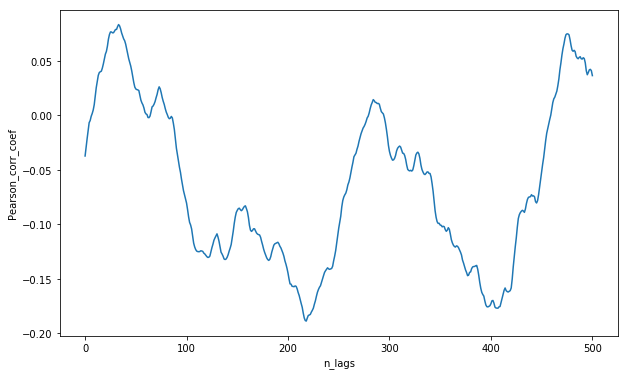

In [49]:
plt.figure(figsize=(10,6))
plt.plot(lag, coefficients)
plt.xlabel('n_lags')
plt.ylabel('Pearson_corr_coef')